In [1825]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1826]:
data = pd.read_excel('dataset_hw3.xlsx')

In [1827]:
data.shape

(1411, 13)

### 쓸모없는 열 지우기

In [1828]:
data = data.drop(['movie_ID', 'title', 'genre'], axis = 1)
data.head()

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,113,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,107,9.11,9388,812,미국,15세이상관람가,코리아픽쳐스(주),2005,11,506609
2,86,6.51,873,393,한국,15세이상관람가,NaN,2010,4,47160
3,98,5.62,266,352,한국,15세이상관람가,㈜스튜디오이쩜영,2008,11,94993
4,103,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453


In [1829]:
data['rating'].unique()

array(['15세이상관람가', '전체관람가', '12세이상관람가', '청소년관람불가'], dtype=object)

In [1830]:
for i in range(data.shape[0]):
    if data.iloc[i,5] == '전체관람가':
        data.iloc[i,5] = 0
    elif data.iloc[i,5] == '12세이상관람가':
        data.iloc[i,5] = 1
    elif data.iloc[i,5] == '15세이상관람가':
        data.iloc[i,5] = 2
    else:
        data.iloc[i,5] = 3


In [1831]:
data['country'].unique()

array(['한국', '미국', '독일', '프랑스', '대만', '일본', '중국', '스페인', '홍콩', '영국', '호주',
       '멕시코', '벨기에', '캐나다', '러시아', '덴마크', '인도', '아이슬란드', '이탈리아',
       '남아프리카공화국', '페루', '스웨덴', '오스트리아 ', '아일랜드', '뉴질랜드'], dtype=object)

In [1832]:
for i in range(data.shape[0]):
    if data.iloc[i,4] == '한국':
        data.iloc[i,4] = 0
    else:
        data.iloc[i,4] = 1

In [1833]:
'''for i in range(data.shape[0]):
    if data['released_year'][i] in [2005, 2008, 2009]:
        data.iloc[i,7] = 0
    elif data['released_year'][i] in [2010, 2011, 2012]:
        data.iloc[i,7] = 1
    elif data['released_year'][i] in [2013, 2014, 2015]:
        data.iloc[i,7] = 2
    else:
        data.iloc[i,7] = 3'''

"for i in range(data.shape[0]):\n    if data['released_year'][i] in [2005, 2008, 2009]:\n        data.iloc[i,7] = 0\n    elif data['released_year'][i] in [2010, 2011, 2012]:\n        data.iloc[i,7] = 1\n    elif data['released_year'][i] in [2013, 2014, 2015]:\n        data.iloc[i,7] = 2\n    else:\n        data.iloc[i,7] = 3"

In [1834]:
data.head()

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,113,7.31,5175,8692,0,2,씨제이엔터테인먼트,2011,2,844103
1,107,9.11,9388,812,1,2,코리아픽쳐스(주),2005,11,506609
2,86,6.51,873,393,0,2,NaN,2010,4,47160
3,98,5.62,266,352,0,2,㈜스튜디오이쩜영,2008,11,94993
4,103,6.53,3005,2953,0,2,(주)쇼박스,2016,1,652453


### 계절 분류(원핫 인코딩)

In [1835]:
'''for i in range(data.shape[0]):
    if data['released_month'][i] in [12, 1, 2]:
        data.iloc[i,8] = '겨울'
    elif data['released_month'][i] in [3, 4, 5]:
        data.iloc[i,8] = '봄'
    elif data['released_month'][i] in [6, 7, 8]:
        data.iloc[i,8] = '여름'
    else:
        data.iloc[i,8] = '가을'''

"for i in range(data.shape[0]):\n    if data['released_month'][i] in [12, 1, 2]:\n        data.iloc[i,8] = '겨울'\n    elif data['released_month'][i] in [3, 4, 5]:\n        data.iloc[i,8] = '봄'\n    elif data['released_month'][i] in [6, 7, 8]:\n        data.iloc[i,8] = '여름'\n    else:\n        data.iloc[i,8] = '가을"

In [1836]:
#data1 = pd.get_dummies(data.released_month) 

In [1837]:
#data = pd.concat([data1, data], axis=1)

In [1838]:
data = data.drop(['released_month'], axis = 1)

In [1839]:
#data.head()

### running time = 0 제거

In [1840]:
data[data['running_time'] == 0]

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,num_viewers
499,0,7.3,1620,383,1,0,롯데쇼핑㈜롯데엔터테인먼트,2011,815991
520,0,8.4,498,30,1,0,이십세기폭스코리아(주),2011,569773


In [1841]:
data.drop([499,520], inplace = True)

### 제작사

In [1842]:
company_unique = data['companyNm'].unique()

In [1843]:
len(company_unique)

129

In [1844]:
cNm_dict = {}
for i in company_unique:
    a = data[data['companyNm'] == i].shape[0]
    cNm_dict[i] = a

In [1845]:
import operator
sort_dict = sorted(cNm_dict.items(), key=lambda kv: kv[1])
sort_dict10 = sort_dict[::-1][:9]

In [1846]:
sort_dict10

[('롯데쇼핑㈜롯데엔터테인먼트', 162),
 ('씨제이이앤엠(주)', 124),
 ('유니버설픽쳐스인터내셔널 코리아(유)', 100),
 ('워너브러더스 코리아(주)', 88),
 ('이십세기폭스코리아(주)', 84),
 ('(주)넥스트엔터테인먼트월드(NEW)', 82),
 ('(주)쇼박스', 78),
 ('씨제이엔터테인먼트', 70),
 ('한국소니픽쳐스릴리징브에나비스타영화㈜', 48)]

In [1847]:
sorted_list = []
for i in range(len(sort_dict10)):
    sorted_list.append(sort_dict10[i][0])
sorted_list

['롯데쇼핑㈜롯데엔터테인먼트',
 '씨제이이앤엠(주)',
 '유니버설픽쳐스인터내셔널 코리아(유)',
 '워너브러더스 코리아(주)',
 '이십세기폭스코리아(주)',
 '(주)넥스트엔터테인먼트월드(NEW)',
 '(주)쇼박스',
 '씨제이엔터테인먼트',
 '한국소니픽쳐스릴리징브에나비스타영화㈜']

In [1848]:
data.shape

(1409, 9)

In [1849]:
for i in range(data.shape[0]):
    if data.iloc[i,6] in sorted_list:
        data.iloc[i,6] = 1
    else:
        data.iloc[i,6] = 0

In [1850]:
data.corr(method = 'pearson')

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,num_viewers
running_time,1.000000,0.172019,0.326162,0.246071,-0.036905,0.195054,0.172333,0.055543,0.319327
netizen_ratings,0.172019,1.000000,0.187507,0.041830,0.149926,-0.271130,-0.016286,0.181951,0.211383
num_reviews,0.326162,0.187507,1.000000,0.616752,-0.240855,0.019151,0.195802,0.138139,0.842517
num_article,0.246071,0.041830,0.616752,1.000000,-0.574611,0.163906,0.175282,0.154723,0.601138
country,-0.036905,0.149926,-0.240855,-0.574611,1.000000,-0.186113,-0.079232,-0.033777,-0.214391
rating,0.195054,-0.271130,0.019151,0.163906,-0.186113,1.000000,-0.014206,-0.047312,-0.035895
companyNm,0.172333,-0.016286,0.195802,0.175282,-0.079232,-0.014206,1.000000,-0.125775,0.249039
released_year,0.055543,0.181951,0.138139,0.154723,-0.033777,-0.047312,-0.125775,1.000000,0.066331
num_viewers,0.319327,0.211383,0.842517,0.601138,-0.214391,-0.035895,0.249039,0.066331,1.000000


In [1851]:
#data.drop(['released_year', 'rating'], axis = 1, inplace = True)

### 산점도로 변수 간의 관계 파악하기

Text(0.5, 1.0, 'running_time^2')

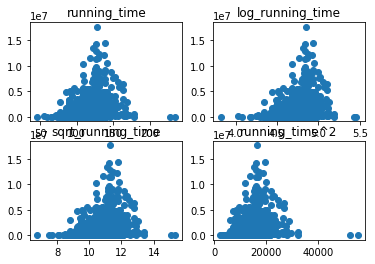

In [1852]:
import matplotlib.pyplot as plt
# Change the line plot below to a scatter plot
plt.subplot(221)
plt.scatter(data['running_time'], data['num_viewers'])
plt.title("running_time")

plt.subplot(222)
plt.scatter(np.log(data['running_time']), data['num_viewers'])
plt.title("log_running_time")

plt.subplot(223)
plt.scatter(np.sqrt(data['running_time']), data['num_viewers'])
plt.title("sqrt_running_time")

plt.subplot(224)
plt.scatter(data['running_time']**2, data['num_viewers'])
plt.title("running_time^2")



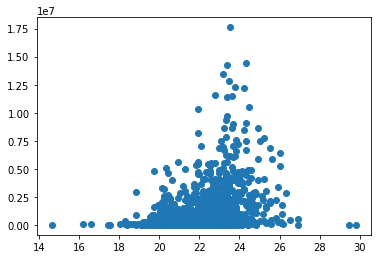

In [1853]:
log_rt = np.log(data['running_time'])
plt.scatter(log_rt**2, data['num_viewers'])
# Show plot
#log가 가장 맞는듯?
plt.show()

In [1854]:
f = lambda x: (np.log(x))**2
data.running_time = data.running_time.apply(f)

In [1855]:
data.corr(method = 'pearson')

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,num_viewers
running_time,1.000000,0.171351,0.327599,0.253674,-0.049320,0.210336,0.182464,0.052419,0.320775
netizen_ratings,0.171351,1.000000,0.187507,0.041830,0.149926,-0.271130,-0.016286,0.181951,0.211383
num_reviews,0.327599,0.187507,1.000000,0.616752,-0.240855,0.019151,0.195802,0.138139,0.842517
num_article,0.253674,0.041830,0.616752,1.000000,-0.574611,0.163906,0.175282,0.154723,0.601138
country,-0.049320,0.149926,-0.240855,-0.574611,1.000000,-0.186113,-0.079232,-0.033777,-0.214391
rating,0.210336,-0.271130,0.019151,0.163906,-0.186113,1.000000,-0.014206,-0.047312,-0.035895
companyNm,0.182464,-0.016286,0.195802,0.175282,-0.079232,-0.014206,1.000000,-0.125775,0.249039
released_year,0.052419,0.181951,0.138139,0.154723,-0.033777,-0.047312,-0.125775,1.000000,0.066331
num_viewers,0.320775,0.211383,0.842517,0.601138,-0.214391,-0.035895,0.249039,0.066331,1.000000


Text(0.5, 1.0, 'netizen_ratings')

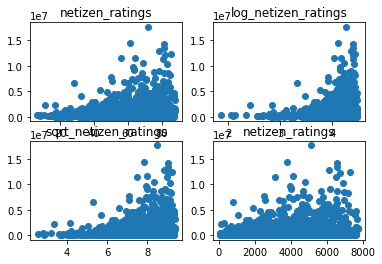

In [1874]:
plt.subplot(221)
plt.scatter(data['netizen_ratings'], data['num_viewers'])
plt.title("netizen_ratings")

plt.subplot(222)
plt.scatter(np.log(data['netizen_ratings']), data['num_viewers'])
plt.title("log_netizen_ratings")

plt.subplot(223)
plt.scatter(np.sqrt(data['netizen_ratings']), data['num_viewers'])
plt.title("sqrt_netizen_ratings")

plt.subplot(224)
plt.scatter(data['netizen_ratings']**2, data['num_viewers'])
plt.title("netizen_ratings")

In [1857]:
f = lambda x: x**2
data['netizen_ratings'] = data.netizen_ratings.apply(f)

In [1858]:
data.corr(method = 'pearson')

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,num_viewers
running_time,1.000000,0.169398,0.327599,0.253674,-0.049320,0.210336,0.182464,0.052419,0.320775
netizen_ratings,0.169398,1.000000,0.201484,0.044301,0.142984,-0.286604,-0.020965,0.181294,0.220905
num_reviews,0.327599,0.201484,1.000000,0.616752,-0.240855,0.019151,0.195802,0.138139,0.842517
num_article,0.253674,0.044301,0.616752,1.000000,-0.574611,0.163906,0.175282,0.154723,0.601138
country,-0.049320,0.142984,-0.240855,-0.574611,1.000000,-0.186113,-0.079232,-0.033777,-0.214391
rating,0.210336,-0.286604,0.019151,0.163906,-0.186113,1.000000,-0.014206,-0.047312,-0.035895
companyNm,0.182464,-0.020965,0.195802,0.175282,-0.079232,-0.014206,1.000000,-0.125775,0.249039
released_year,0.052419,0.181294,0.138139,0.154723,-0.033777,-0.047312,-0.125775,1.000000,0.066331
num_viewers,0.320775,0.220905,0.842517,0.601138,-0.214391,-0.035895,0.249039,0.066331,1.000000


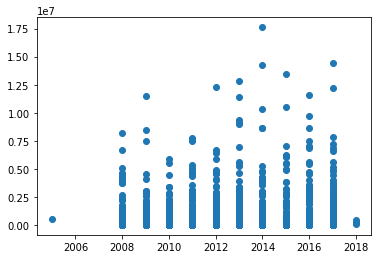

In [1859]:
plt.scatter(data['released_year'], data['num_viewers'])

In [1860]:
data.head()

,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,num_viewers
0,22.348196,53.4361,5175,8692,0,2,1,2011,844103
1,21.835329,82.9921,9388,812,1,2,0,2005,506609
2,19.841210,42.3801,873,393,0,2,0,2010,47160
3,21.021927,31.5844,266,352,0,2,0,2008,94993
4,21.480713,42.6409,3005,2953,0,2,1,2016,652453


In [1862]:
#data.drop(['rating'], axis = 1, inplace = True)

### Train, test split

In [1863]:
data_np = data.values
data_np

array([[2.23481956e+01, 5.34361000e+01, 5.17500000e+03, ...,
        1.00000000e+00, 2.01100000e+03, 8.44103000e+05],
       [2.18353293e+01, 8.29921000e+01, 9.38800000e+03, ...,
        0.00000000e+00, 2.00500000e+03, 5.06609000e+05],
       [1.98412098e+01, 4.23801000e+01, 8.73000000e+02, ...,
        0.00000000e+00, 2.01000000e+03, 4.71600000e+04],
       ...,
       [2.43490330e+01, 6.27264000e+01, 9.81600000e+03, ...,
        1.00000000e+00, 2.01700000e+03, 2.05131500e+06],
       [2.06415275e+01, 8.44561000e+01, 5.30400000e+03, ...,
        0.00000000e+00, 2.01700000e+03, 4.09345000e+05],
       [2.06415275e+01, 5.71536000e+01, 6.57000000e+02, ...,
        0.00000000e+00, 2.01800000e+03, 6.98340000e+04]])

In [1864]:
y = data_np[:,-1]
X = data_np[:,:-1]

##### standard sclaler

In [1866]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)##결과가 잘 안나옴

In [1800]:
from sklearn.model_selection import train_test_split

In [1801]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Linear Regression

In [1921]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1922]:
scores = cross_val_score(model, X, y, cv=5)
np.mean(scores)

0.6891450316618799

In [1882]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Ridge

In [1734]:
ridge = Ridge()
param = {'alpha': [1e-10, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, param,cv = 5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1811]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
0.6891703138283729


#### Rasso

In [1884]:
lasso = Lasso()
param = {'alpha': [1e-10, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, param,cv = 5)
lasso_regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1885]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 20}
0.6890786094662626


### polynomial regression

In [1915]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=3, include_bias=True)
#degree 늘리면 overfitting 됨

In [1916]:
X_poly = polynomial.fit_transform(X)

In [1963]:
model_poly = LinearRegression()
model_poly = model_poly.fit(X_poly, y)

In [1964]:
scores = cross_val_score(model_poly.fit(X_poly, y), X, y, cv=5)
np.mean(scores)

0.6891450316618799

### Decision Tree

In [1943]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=4) #4일 때 제일 잘 나옴
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1939]:
tree_reg.score(X_train,y_train)

0.8471378136191408

In [1940]:
tree_reg.score(X_test,y_test)

0.8806908463893575

In [1944]:
scores = cross_val_score(tree_reg, X, y, cv=5)
np.mean(scores)

0.6400312365763918

### Bagging

In [1783]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

In [1957]:
bag_clf = BaggingRegressor(DecisionTreeRegressor(), n_estimators=70)
# n_estimators => sample의 갯수

In [1954]:
tree_params = {
    'n_estimators' : [10,20,50,70,100,200,500,1000]
    
}


grid_search = GridSearchCV(gbrt, param_grid=tree_params, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 50, 70, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1956]:
grid_search.best_params_

{'n_estimators': 70}

In [1960]:
scores = cross_val_score(bag_clf, X, y, cv=5)
print(scores)
print(np.mean(scores))

[0.52112793 0.59453899 0.7776054  0.85321233 0.79075724]
0.7074483789347863


### Boosting

In [1786]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 4)

In [1961]:
tree_params = {
    'max_depth' : [2,3,4,5,6,7,8,9]
    
}


grid_search = GridSearchCV(gbrt, param_grid=tree_params, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1962]:
grid_search.best_params_

{'max_depth': 4}

In [1877]:
scores = cross_val_score(gbrt, X, y, cv=5)
print(scores)
print(np.mean(scores))

[0.55538188 0.64790694 0.781568   0.87911827 0.79975081]
0.7327451800809964


In [1711]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

In [1712]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2))

In [1747]:
tree_params = {
    'max_depth' : [2,3,4,5,6,7,8,9]
    
}


grid_search = GridSearchCV(ada_clf, param_grid=tree_params, cv=5)
grid_search.fit(X, y)

ValueError: Invalid parameter max_depth for estimator AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [1748]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [1714]:
ada_clf.score(X_train,y_train)

0.7326779069531268

In [1715]:
ada_clf.score(X_test,y_test)

0.5645939261763631

In [1716]:
scores = cross_val_score(ada_clf, X, y, cv=5)
print(scores)
print(np.mean(scores))

[0.57273335 0.50844227 0.70374471 0.77138675 0.64761892]
0.6407851981230248


### Random Forest

In [1790]:
from sklearn.ensemble import RandomForestRegressor

In [1878]:
rnd_reg = RandomForestRegressor(max_depth = 4, n_estimators = 100)
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1719]:
tree_params = {
    'max_depth' : [2,3,4,5,6,7],
    'n_estimators':[10,20, 50, 100, 200, 500]
}


grid_search = GridSearchCV(xgb_model, param_grid=tree_params, cv=5)
grid_search.fit(X, y)

"tree_params = {\n    'max_depth' : [2,3,4,5,6,7],\n    'n_estimators':[10,20, 50, 100, 200, 500]\n}\n\n\ngrid_search = GridSearchCV(xgb_model, param_grid=tree_params, cv=5)\ngrid_search.fit(X, y)\ngrid_search.best_params_"

In [1720]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [1879]:
rnd_reg.score(X_train,y_train)

0.8412528721606306

In [1880]:
rnd_reg.score(X_test,y_test)

0.7488096401398101

In [1881]:
scores = cross_val_score(rnd_reg, X, y, cv=5)

np.mean(scores)

0.694173199629477

### XGBoost

In [1795]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(max_depth=4, n_estimators=100)

In [1744]:
tree_params = {
    'max_depth' : [2,3,4,5,6,7,8,9],
    'n_estimators':[100, 200, 500, 1000, 1500]
}

In [1745]:
grid_search = GridSearchCV(xgb_model, param_grid=tree_params, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
# Best hyperparameter의 값들을 return 합니다.

[18:30:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:09] WARNI

[18:30:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:44] WARNI

[18:31:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:42] WARNI

[18:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:01] WARNI

[18:34:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 4, 'n_estimators': 100}

In [1746]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [1867]:
scores = cross_val_score(xgb_model, X, y, cv=5)
np.mean(scores)

[19:23:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7491808407649257

In [1873]:
np.mean(scores)

0.7491388720566887